# Unsupervised methods for time series analysis

We will be using the mortgage affordability provided by Zillow https://www.zillow.com/research/data/

The project repository includes the data and utility functions to load and plot it

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import affordability_lib.utils as utils

afford_df = utils.get_affordability_df()
afford_df.head(10)
# Have added columns for Geographic Region and Geographic Region Codes, DC has been included in Northeast
# {0:'Northeast', 1:'West', 2:'Midwest', 3:'South'}

,RegionID,RegionName,SizeRank,GeographicRegionName,GeographicRegionCode,1979-03,1979-06,1979-09,1979-12,1980-03,...,2014-12,2015-03,2015-06,2015-09,2015-12,2016-03,2016-06,2016-09,2016-12,2017-03
324,394913,"New York, NY",1,Northeast,0,0.261700,0.278316,0.284399,0.319438,0.379845,...,0.241961,0.240494,0.247387,0.245957,0.249606,0.241544,0.239503,0.240021,0.265376,0.269264
325,753899,"Los Angeles-Long Beach-Anaheim, CA",2,West,1,0.357694,0.388161,0.401762,0.459422,0.541508,...,0.383162,0.382531,0.396277,0.395686,0.402116,0.393042,0.390708,0.386895,0.430334,0.433476
326,394463,"Chicago, IL",3,Midwest,2,0.261928,0.276790,0.276248,0.309709,0.353099,...,0.134913,0.134063,0.139074,0.137962,0.138784,0.134412,0.133701,0.132856,0.147025,0.149054
327,394514,"Dallas-Fort Worth, TX",4,South,3,0.301131,0.328453,0.340857,0.386321,0.452818,...,0.118163,0.117663,0.124935,0.128167,0.133517,0.131539,0.133219,0.135142,0.149861,0.152387
328,394974,"Philadelphia, PA",5,Northeast,0,0.204333,0.215107,0.219247,0.247690,0.295396,...,0.141915,0.139100,0.142831,0.141625,0.142089,0.137387,0.135599,0.135064,0.148746,0.148559
329,394692,"Houston, TX",6,South,3,0.243178,0.265630,0.268049,0.294382,0.342770,...,0.112149,0.113520,0.118255,0.119155,0.122370,0.120863,0.120717,0.120675,0.132078,0.130511
330,395209,"Washington, DC",7,Northeast,0,0.254252,0.264869,0.277353,0.314773,0.373035,...,0.174821,0.173381,0.178910,0.177032,0.178584,0.172367,0.169965,0.168010,0.185774,0.186239
331,394856,"Miami-Fort Lauderdale, FL",8,South,3,0.267852,0.284229,0.287053,0.332037,0.392403,...,0.181766,0.183585,0.194088,0.197580,0.203430,0.197855,0.198292,0.199508,0.221129,0.222176
332,394347,"Atlanta, GA",9,South,3,0.248301,0.264578,0.271742,0.312490,0.371988,...,0.113326,0.113214,0.117454,0.118066,0.120754,0.117895,0.117187,0.116937,0.130104,0.131081
333,394404,"Boston, MA",10,Northeast,0,0.222021,0.237248,0.239940,0.276893,0.316496,...,0.212892,0.210786,0.216809,0.217371,0.221722,0.215844,0.214103,0.212644,0.236357,0.239656


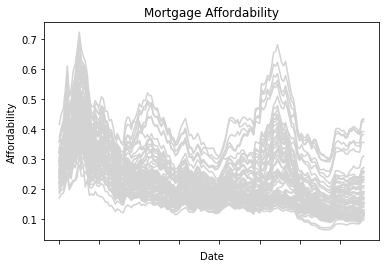

In [3]:
import matplotlib.pylab as plt

utils.plot_affordability_series(afford_df)
plt.show()

## Task I: Clustering

(1) Use the kmeans algorithm to cluster the timeseries data. The
implementation of kmeans for sklearn is described here:
http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

You need to make some choices: 
  - Preprocessing: should you scale and center data before clustering?
  - Initialization: How will you choose starting centroids
  - Evaluation: How will you determine the number of clusters to use for next steps of analysis. Here are options implemented in sklearn: http://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation. Here is an implementation of the gap statistic method shown in lecture (use at your discretion): https://github.com/Zelazny7/gap-statistic/blob/master/gap.py
  
Make sure to include your choices for the above in your writeup.

In [4]:
# creating training and test set data
train_df, test_df = utils.split_train_test(afford_df)
train_df.head()

,RegionID,RegionName,SizeRank,GeographicRegionName,GeographicRegionCode,1979-03,1979-06,1979-09,1979-12,1980-03,...,2012-09,2012-12,2013-03,2013-06,2013-09,2013-12,2014-03,2014-06,2014-09,2014-12
324,394913,"New York, NY",1,Northeast,0,0.261700,0.278316,0.284399,0.319438,0.379845,...,0.224406,0.217553,0.224845,0.241536,0.260265,0.261124,0.258286,0.253598,0.252561,0.241961
325,753899,"Los Angeles-Long Beach-Anaheim, CA",2,West,1,0.357694,0.388161,0.401762,0.459422,0.541508,...,0.304163,0.300080,0.320920,0.359241,0.399297,0.402892,0.400288,0.393393,0.395619,0.383162
326,394463,"Chicago, IL",3,Midwest,2,0.261928,0.276790,0.276248,0.309709,0.353099,...,0.121624,0.117433,0.121061,0.131412,0.141545,0.142888,0.141657,0.138968,0.140140,0.134913
327,394514,"Dallas-Fort Worth, TX",4,South,3,0.301131,0.328453,0.340857,0.386321,0.452818,...,0.104923,0.101957,0.105754,0.114501,0.123787,0.125153,0.123385,0.121437,0.121808,0.118163
328,394974,"Philadelphia, PA",5,Northeast,0,0.204333,0.215107,0.219247,0.247690,0.295396,...,0.138880,0.134923,0.139083,0.148469,0.156956,0.155812,0.153202,0.149514,0.148801,0.141915


In [5]:
# Pre-processing data
import numpy as np
from sklearn.preprocessing import StandardScaler
metadata_columns = ['RegionID', 'RegionName', 'SizeRank', 'GeographicRegionName', 'GeographicRegionCode']
metadata = train_df[metadata_columns]
df = train_df.drop(columns=metadata_columns)
scaler = StandardScaler()
train_X = scaler.fit_transform(df)
print(train_X.shape)

(75, 144)


In [6]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, init='k-means++', n_jobs=4)
kmeans = kmeans.fit(train_X)
labels = kmeans.predict(train_X)
print(labels)

[2 1 0 0 0 3 0 0 0 2 1 3 2 0 2 0 1 3 0 0 2 3 2 3 2 0 0 0 0 2 0 0 1 0 2 0 0
 0 3 3 0 0 0 0 2 1 3 2 2 3 0 0 0 3 3 3 2 3 2 3 0 3 0 2 1 3 3 2 3 2 3 2 2 2
 3]


Clustering Discussion

1) As there were many values greater than 1, I have standardised the affordability data as a part of pre-processing.
2) I have started with 4 regions in the US based on geography, and appended labels to the data accordingly.
3) For metrics, I have utilized Adjusted Rand Index.

(2) Further analysis: Plot the resulting cluster centroids and provide a qualitative description of each cluster. Look at the region names and size ranks for the time series you obtain, do resulting clusters reflect geographic or population similarities across regions?

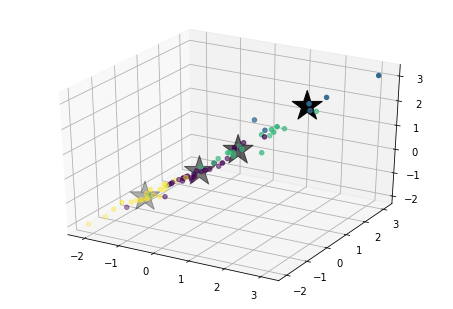

In [7]:
# clustering analysis goes here
from mpl_toolkits.mplot3d import Axes3D
centroids = kmeans.cluster_centers_
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(train_X[:, 0], train_X[:, 1], train_X[:, 2], c=labels)
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker='*', c='#050505', s=1000)

In [8]:
from sklearn import metrics
labels_true = train_df['GeographicRegionCode'].tolist()
labels_pred = labels
metrics.adjusted_rand_score(labels_true, labels_pred) 

0.17688900041500585

The accuracy of classification is pretty low! This could be due to:

1) Very low number of data points in training set(=75) after we removed all the NA values.
2) Also, the number of clusters could be higher, with regions being further geographically divided as Mid-Atlantic, Mountain etc

## Task 2: Dimensionality Reduction via Decomposition
    
(1) Apply one  "global" dimensionality reduction technique, e.g., PCA or Non-negative Matrix Factorization (http://scikit-learn.org/stable/modules/classes.html#module-sklearn.decomposition) to the affordability data. 

In [9]:
# decomposition code here

import pandas as pd
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
print(pca)
principalComponents = pca.fit_transform(train_X)
principal_df = pd.DataFrame(data = principalComponents, columns = ['principal_component_one', 'principal_component_two'])
principal_df.reset_index(drop=True, inplace=True)
train_df.reset_index(drop=True, inplace=True)
final_principal_df = pd.concat([principal_df, train_df['GeographicRegionCode']], axis = 1)
final_principal_df.head()

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)


,principal_component_one,principal_component_two,GeographicRegionCode
0,15.765939,-3.038526,0
1,30.403969,-2.289070,1
2,-0.609671,-1.984435,2
3,-3.127636,7.851049,3
4,-5.260797,-3.900719,0


(2) Plot the transformed data in two dimensions. Color regions based on clusters found in Task 1. Plot again coloring based on geography or size. Does the data in reduced dimension reflect any of these characteristics?

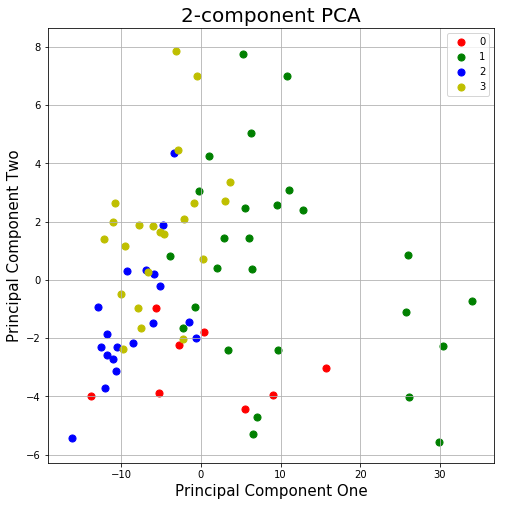

In [10]:
# plotting code here

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component One', fontsize = 15)
ax.set_ylabel('Principal Component Two', fontsize = 15)
ax.set_title('2-component PCA', fontsize = 20)
targets = [0, 1, 2, 3]
colors = ['r', 'g', 'b', 'y']
for target, color in zip(targets,colors):
    indicesToKeep = final_principal_df['GeographicRegionCode'] == target
    ax.scatter(final_principal_df.loc[indicesToKeep, 'principal_component_one']
               , final_principal_df.loc[indicesToKeep, 'principal_component_two']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

We have reduced the dimensionality of our data from 144 to 2 principal components. The components try to capture the maximum variance in our data, we can see for West coast states (green dots) the component values are quite scattered, implying a larger relative variance in the affordability values for these states. 

## Task 3: Dimensionality Reduction via Manifold Learning
    
(1) Apply one  "local" dimensionality reduction technique, e.g., LLE or tSNE (http://scikit-learn.org/stable/modules/classes.html#module-sklearn.manifold) to the affordability data. 

In [11]:
# manifold code here

from sklearn.manifold import LocallyLinearEmbedding
lle = LocallyLinearEmbedding(n_neighbors=74, n_components=2, method='standard',
                               eigen_solver='dense', n_jobs=4)
print(lle)
lle_model = lle.fit_transform(train_X)
lle_df = pd.DataFrame(data = lle_model, columns = ['LLE_component_one', 'LLE_component_two'])
lle_df.reset_index(drop=True, inplace=True)
train_df.reset_index(drop=True, inplace=True)
final_lle_df = pd.concat([lle_df, train_df['GeographicRegionCode']], axis = 1)
final_lle_df.head()

LocallyLinearEmbedding(eigen_solver='dense', hessian_tol=0.0001, max_iter=100,
            method='standard', modified_tol=1e-12, n_components=2,
            n_jobs=4, n_neighbors=74, neighbors_algorithm='auto',
            random_state=None, reg=0.001, tol=1e-06)


,LLE_component_one,LLE_component_two,GeographicRegionCode
0,-0.154741,-0.103905,0
1,-0.307376,-0.105331,1
2,0.010350,-0.081311,2
3,0.014282,0.311625,3
4,0.066084,-0.137292,0


(2) Plot the transformed data in two dimensions. Color regions based on clusters found in Task 1. Plot again coloring based on geography or size. Does the data in reduced dimension reflect any of these characteristics?

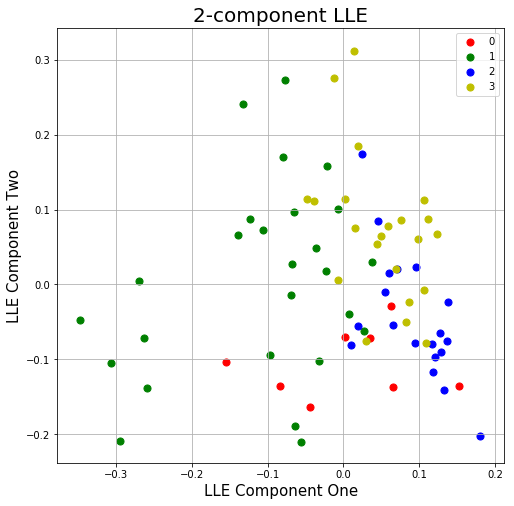

In [12]:
# plotting code here

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('LLE Component One', fontsize = 15)
ax.set_ylabel('LLE Component Two', fontsize = 15)
ax.set_title('2-component LLE', fontsize = 20)
targets = [0, 1, 2, 3]
colors = ['r', 'g', 'b', 'y']
for target, color in zip(targets,colors):
    indicesToKeep = final_lle_df['GeographicRegionCode'] == target
    ax.scatter(final_lle_df.loc[indicesToKeep, 'LLE_component_one']
               , final_lle_df.loc[indicesToKeep, 'LLE_component_two']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

We have used locally linear embedding (LLE) as a local DR technique. Since our dataset is not huge, we try to preserve the actual distances of (74) nearest neighbors of almost all the points.